In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('Iris.csv')
del data['Id']

In [3]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [6]:
train,test = train_test_split(data, test_size = 0.4, stratify = data['Species'], random_state = 42)

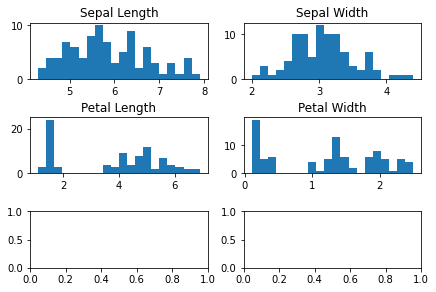

In [7]:
#Plotting some histograms

n_bins = 20
fig, axs = plt.subplots(3,2)
axs[0,0].hist(train['SepalLengthCm'], bins = n_bins)
axs[0,0].set_title('Sepal Length')

axs[0,1].hist(train['SepalWidthCm'], bins = n_bins)
axs[0,1].set_title('Sepal Width')

axs[1,0].hist(train['PetalLengthCm'], bins = n_bins)
axs[1,0].set_title('Petal Length')

axs[1,1].hist(train['PetalWidthCm'], bins= n_bins)
axs[1,1].set_title('Petal Width')


fig.tight_layout(pad=0.5)

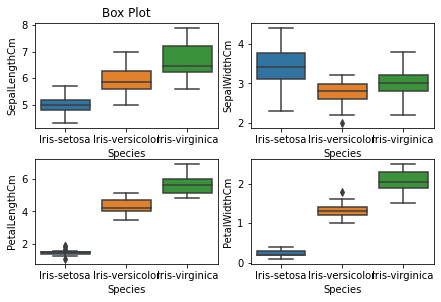

In [8]:
#plotting some box plots
fig, axs = plt.subplots(2,2)
fn = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm","PetalWidthCm"]
cn = ['Iris-setosa','Iris-versicolor','Iris-virginica']
sns.boxplot(x = 'Species', y= fn[0], data=train, order = cn, ax = axs[0,0])
axs[0,0].set_title('Box Plot')
sns.boxplot(x = 'Species', y=fn[1], data=train, order = cn, ax = axs[0,1])
sns.boxplot(x='Species', y=fn[2], data=train, order=cn, ax=axs[1,0])
sns.boxplot(x='Species', y=fn[3], data=train, order=cn, ax=axs[1,1])

fig.tight_layout(pad=0.01)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

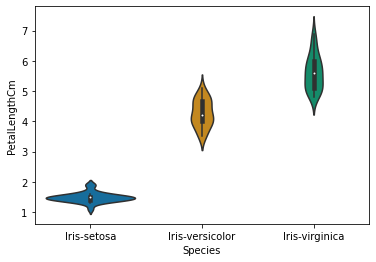

In [9]:
sns.violinplot(x="Species", y="PetalLengthCm", data=train, size=5,order = cn, palette='colorblind')

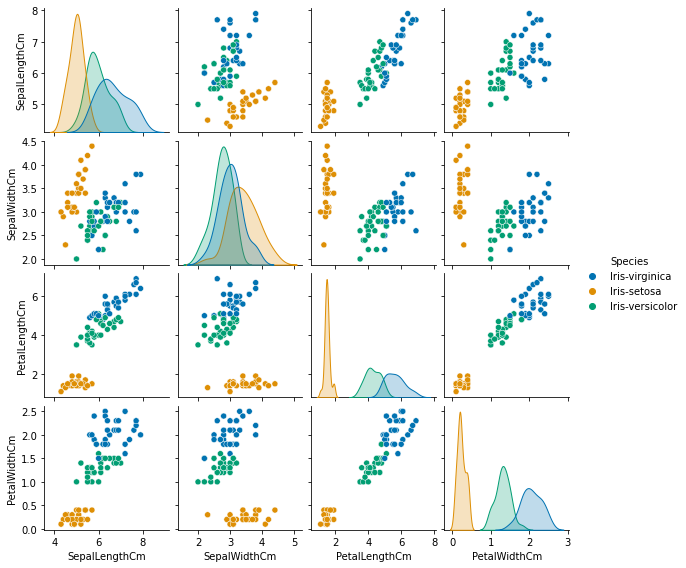

In [10]:

sns.pairplot(train, hue="Species", height=2, palette='colorblind')  # , diag_kind="hist"

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.053903       0.880244      0.820621
SepalWidthCm       -0.053903      1.000000      -0.356527     -0.308922
PetalLengthCm       0.880244     -0.356527       1.000000      0.967031
PetalWidthCm        0.820621     -0.308922       0.967031      1.000000


<AxesSubplot:>

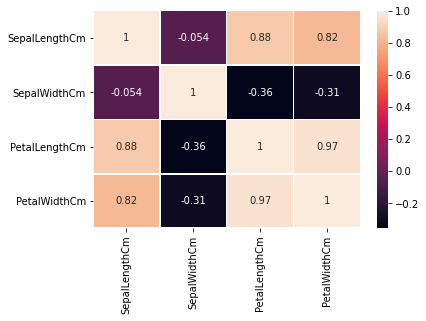

In [11]:
# Correlation matrix
corrmat = train.corr()
print(corrmat)
sns.heatmap(corrmat, annot = True, linewidths=.5)  # more attributes: square = True

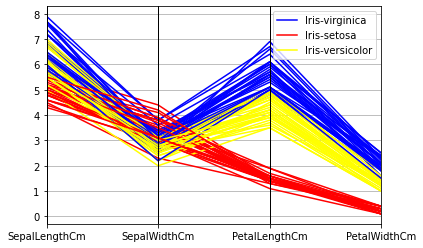

In [14]:
pd.plotting.parallel_coordinates(train, "Species", color=['blue', 'red','yellow']);  #from pandas.plotting

In [15]:
# pd.plotting.scatter_matrix(train, alpha=0.5);

## Building Classifiers

In [16]:
X_train = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]   #Training input
y_train = train.Species                                                                #Target result

X_test = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]     #Test input
y_test = test.Species                                                                  #To be predicted

#### Decision Tree Classifier

In [17]:
#Decision Tree Classifier
model_dt = DecisionTreeClassifier(max_depth =3, random_state = 1)
model_dt.fit(X_train, y_train)
prediction = model_dt.predict(X_test)
score_dt = metrics.accuracy_score(prediction, y_test)
print('The accuracy of the Decision Tree Model is: '+ str(score_dt))

The accuracy of the Decision Tree Model is: 0.9833333333333333


In [18]:
model_dt.feature_importances_       #Shows the importance of different features in building model

array([0.        , 0.        , 0.42430866, 0.57569134])

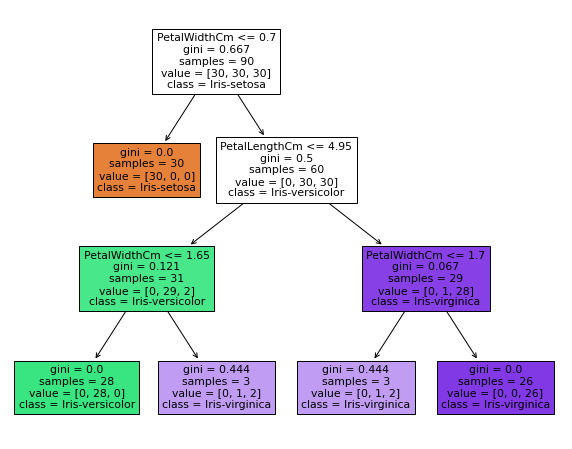

In [19]:
plt.figure(figsize = (10,8))
plot_tree(model_dt, feature_names = fn, class_names = cn, filled = True);

Text(0.5, 1.0, 'Decision Tree Confusion matrix, without normalization')

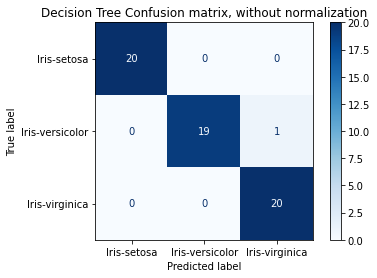

In [20]:
disp = metrics.plot_confusion_matrix(model_dt, X_test, y_test, display_labels = cn, cmap = plt.cm.Blues, normalize = None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization')

#### Gausian Naive Bayes Classifier

In [21]:
# Gaussian Naive Bayes Classifier
model_gnb  = GaussianNB()
model_gnb.fit(X_train, y_train)
prediction_gnb = model_gnb.predict(X_test)
score_gnb = metrics.accuracy_score(prediction_gnb, y_test)
print("The score of prediction using Gaussian Naive Bayes Classifier is: "+str(score_gnb))

The score of prediction using Gaussian Naive Bayes Classifier is: 0.9333333333333333


Text(0.5, 1.0, 'Gaussian Naive Bayes Classifier Confusion matrix, without normalization')

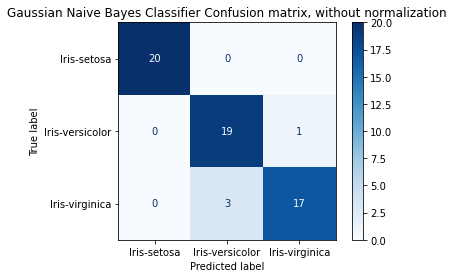

In [22]:
disp = metrics.plot_confusion_matrix(model_gnb, X_test, y_test, display_labels = cn, cmap = plt.cm.Blues, normalize = None)
disp.ax_.set_title('Gaussian Naive Bayes Classifier Confusion matrix, without normalization')

In [23]:
# Gaussian Naive Bayes Classifier with only Petal measurements
model_gnb  = GaussianNB()
model_gnb.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)
prediction_gnb = model_gnb.predict(X_test[['PetalLengthCm','PetalWidthCm']])
score_gnb2 = metrics.accuracy_score(prediction_gnb, y_test)
print("The score of prediction using Gaussian Naive Bayes Classifier is: "+str(score_gnb2))

The score of prediction using Gaussian Naive Bayes Classifier is: 0.95


Text(0.5, 1.0, 'Gaussian Naive Bayes Classifier Confusion matrix, with only petal measurements and without normalization')

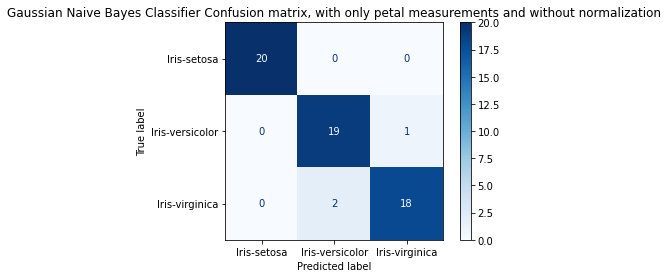

In [24]:
disp = metrics.plot_confusion_matrix(model_gnb, X_test[['PetalLengthCm','PetalWidthCm']], y_test, display_labels = cn, cmap = plt.cm.Blues, normalize = None)
disp.ax_.set_title('Gaussian Naive Bayes Classifier Confusion matrix, with only petal measurements and without normalization')

#### Linear Discriminant Analysis

In [25]:
# Linear Discriminant Analysis (LDA)
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_test, y_test)
prediction_lda = model_lda.predict(X_test)
score_lda = metrics.accuracy_score(prediction_lda, y_test)
print("The score of prediction from Linear Discriminant Analysis is: "+ str(score_lda))

model_lda.fit(X_test[['PetalLengthCm','PetalWidthCm']], y_test)
prediction_lda = model_lda.predict(X_test[['PetalLengthCm','PetalWidthCm']])
score_lda2 = metrics.accuracy_score(prediction_lda, y_test)
print("The score of prediction from Linear Discriminant Analysis with Petal measures only is: "+ str(score_lda2))

The score of prediction from Linear Discriminant Analysis is: 0.9833333333333333
The score of prediction from Linear Discriminant Analysis with Petal measures only is: 0.95


Text(0.5, 1.0, 'Linear Discriminant Analysis Confusion matrix,with Petal measures and without normalization')

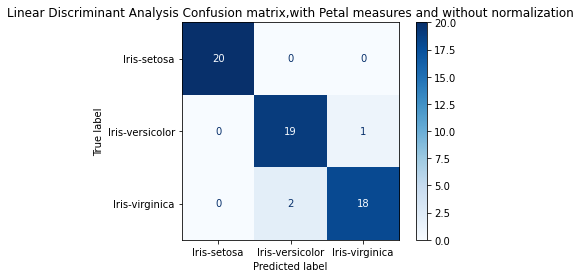

In [26]:
disp = metrics.plot_confusion_matrix(model_lda, X_test[['PetalLengthCm','PetalWidthCm']], y_test, display_labels = cn, cmap = plt.cm.Blues, normalize = None)
disp.ax_.set_title('Linear Discriminant Analysis Confusion matrix,with Petal measures and without normalization')

#### Quadratic Discriminant Analysis

In [27]:
#Quadratic Discriminant Analysis (QDA)
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train, y_train)
prediction_qda = model_qda.predict(X_test)
score_qda = metrics.accuracy_score(prediction_qda, y_test)
print("The score of Quadratic Discriminant Analysis is: "+ str(score_qda))
model_qda.fit(X_test[['PetalLengthCm','PetalWidthCm']], y_test)
prediction_qda = model_qda.predict(X_test[['PetalLengthCm','PetalWidthCm']])
score_qda2 = metrics.accuracy_score(prediction_qda, y_test)
print("The score of prediction from Quadratic Discriminant Analysis with Petal measures only is: "+ str(score_qda2))

The score of Quadratic Discriminant Analysis is: 0.9833333333333333
The score of prediction from Quadratic Discriminant Analysis with Petal measures only is: 0.9666666666666667


Text(0.5, 1.0, 'Quadratic Discriminant Analysis Confusion matrix,with Petal measures only and without normalization')

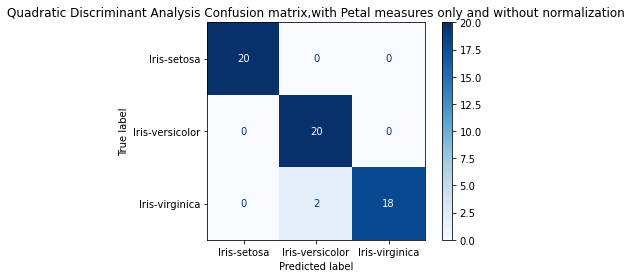

In [28]:
disp = metrics.plot_confusion_matrix(model_qda, X_test[['PetalLengthCm','PetalWidthCm']], y_test, display_labels = cn, cmap = plt.cm.Blues, normalize = None)
disp.ax_.set_title('Quadratic Discriminant Analysis Confusion matrix,with Petal measures only and without normalization')

#### K-Nearest Neighbors

The score of KNN is: 0.9666666666666667
The score of KNN with only petal measures is: 0.95


Text(0.5, 1.0, 'KNN Confusion matrix,with Petal measures only and without normalization')

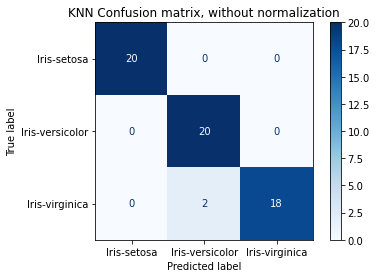

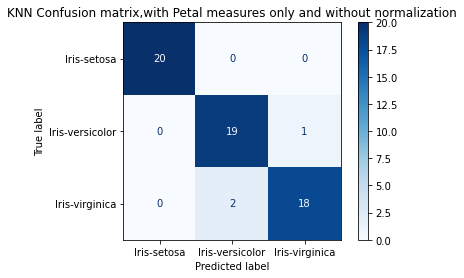

In [29]:
#KNN classifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
prediction_knn = model_knn.predict(X_test)
score_knn = metrics.accuracy_score(prediction_knn, y_test)
print("The score of KNN is: "+ str(score_knn))

disp = metrics.plot_confusion_matrix(model_knn, X_test, y_test, display_labels = cn, cmap = plt.cm.Blues, normalize = None)
disp.ax_.set_title('KNN Confusion matrix, without normalization')

#########################################

model_knn.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)
prediction_knn = model_knn.predict(X_test[['PetalLengthCm','PetalWidthCm']])
score_knn2 = metrics.accuracy_score(prediction_knn, y_test)
print("The score of KNN with only petal measures is: "+ str(score_knn2))

disp = metrics.plot_confusion_matrix(model_knn, X_test[['PetalLengthCm','PetalWidthCm']], y_test, display_labels = cn, cmap = plt.cm.Blues, normalize = None)
disp.ax_.set_title('KNN Confusion matrix,with Petal measures only and without normalization')

#### Logistic Regression

The score of Logistics Regression is: 0.95


c:\users\xbrc7657\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Logistic Regression Confusion matrix,without normalization')

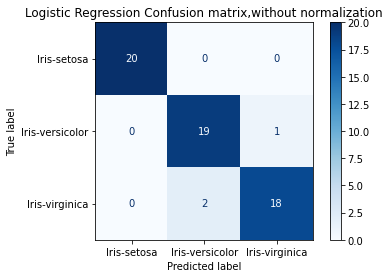

In [30]:
# Logistic Regression
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, y_train)
prediction_lr = model_lr.predict(X_test)
score_lr = metrics.accuracy_score(prediction_lr, y_test)
print("The score of Logistics Regression is: "+ str(score_lr))

disp = metrics.plot_confusion_matrix(model_lr, X_test, y_test, display_labels = cn, cmap = plt.cm.Blues, normalize = None)
disp.ax_.set_title('Logistic Regression Confusion matrix,without normalization')

#### Support Vector Machines

In [31]:
#Support Vector Machines (SVM)
model_svm = SVC()
model_svm.fit(X_train, y_train)
prediction_svm = model_svm.predict(X_test)
score_svm = metrics.accuracy_score(prediction_svm, y_test)

print("The score for SVM is : "+ str(score_svm))

The score for SVM is : 0.9666666666666667


The score for SVM is : 1.0


Text(0.5, 1.0, 'SVM with linear kernel Confusion matrix, without normalization')

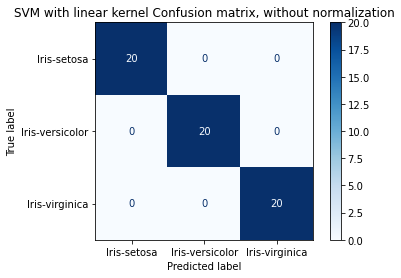

In [33]:
#Support Vector Machines (SVM) with linear kernal
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
prediction_svm = model_svm.predict(X_test)
score_svm2 = metrics.accuracy_score(prediction_svm, y_test)

print("The score for SVM is : "+ str(score_svm2))
disp = metrics.plot_confusion_matrix(model_svm, X_test, y_test, display_labels = cn, cmap = plt.cm.Blues, normalize = None)
disp.ax_.set_title('SVM with linear kernel Confusion matrix, without normalization')

#### Random Forest Classifier

The Score of Random Forest Classifier is : 0.9333333333333333


Text(0.5, 1.0, 'Random Forest Confusion matrix, without normalization')

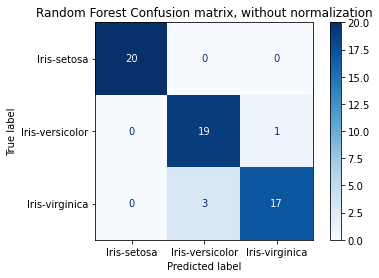

In [34]:
# Random Forest 
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)
prediction_rf = model_rf.predict(X_test)
score_rf = metrics.accuracy_score(prediction_rf, y_test)
print("The Score of Random Forest Classifier is : "+ str(score_rf))

disp = metrics.plot_confusion_matrix(model_rf, X_test, y_test, display_labels = cn, cmap = plt.cm.Blues, normalize = None)
disp.ax_.set_title('Random Forest Confusion matrix, without normalization')

#### XGBoost

In [35]:
#### XGboost####
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

prediction_xgb = model_xgb.predict(X_test)

score_xgb = metrics.accuracy_score(y_test, prediction_xgb)
score_xgb

0.95

# Comparison between above classifiers based on their accuracy scores

In [36]:
modelNames = 'DT', 'GNB', 'GNB2', 'LDA', 'LDA2', 'QDA','QDA2','KNN','KNN2','LR','SVM','SVM-lin-kernel','RF'
accuracy_scores = [score_dt, score_gnb, score_gnb2, score_lda, score_lda2, score_qda, score_qda2, score_knn, score_knn2, score_lr, score_svm, score_svm2, score_rf]
# colors = ["#1f77b4",'#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

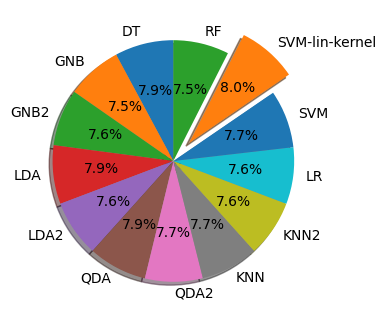

In [37]:
# explode SVM-lin-kernal slice
explode = (0,0,0,0,0,0,0,0,0,0,0,0.2,0)
plt.figure(dpi=100)
plt.pie(accuracy_scores, explode=explode, labels=modelNames, autopct='%1.1f%%', shadow=True, startangle =90);

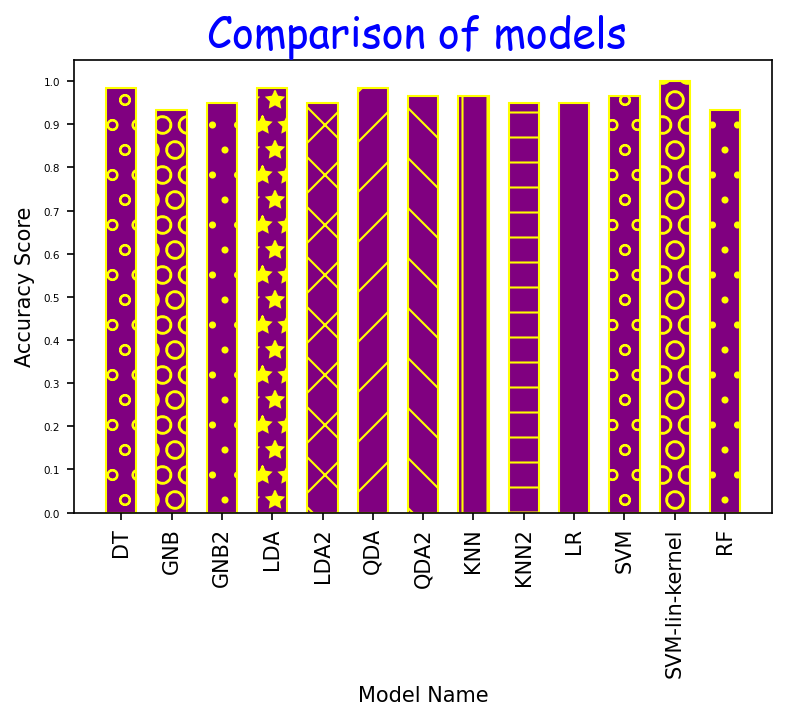

In [38]:
labels = ['A','B','C']
values = [1,4,2]
plt.figure(dpi=150)
bars = plt.bar(modelNames, accuracy_scores, color='purple', width=0.6, align='center', animated=True, edgecolor='yellow')


patterns = [ 'o', 'O', '.', '*', 'x','/', "\\", '|', '-'," "]
p=0
for bar in bars:
    bar.set_hatch(patterns[p])
    p = (p+1) % len(patterns)
plt.title('Comparison of models ', color='blue', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score')

# X, Y tickmarks (scale of the graph)
plt.xticks(fontsize=10, rotation=90)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], fontsize=5)


# plt.grid(True)

plt.show()